# Oracle: Reflex Control with Look-Ahead

Steers the car using a PD controller on the estimated $y_m$ track median offset and track curve look-ahead.

In [3]:
import numpy as np
from DriveItMultiGym import DriveItEnv
from autopilot import LeftLaneFollowingPilot, RightLaneFollowingPilot, \
    LookAheadPilot, ReflexPilot, SharpPilot
from car import Car
from utils import Color
from PositionTracking import TruePosition

num_episodes, time_limit = 1, 10
noisy, random_position = True, True
speed_limit, bot_speed, speed_dev = 2.0, 1.2, 0.0

cars = [Car.HighPerf(Color.green, speed_limit)]
cars.append(Car.Simple(Color.orange, bot_speed))
cars.append(Car.Simple(Color.pink, bot_speed))
#cars.append(Car.Simple(Color.pink, bot_speed))
pilot = LookAheadPilot(cars[0], cars, 
                 ky=3.0, kdy=10.0, 
                 kth=3.0, kdth=10.0, 
                 kka=8.0, kdka=-5.0)
bots, rank = [], np.random.randint(0, 2)
for i in range(1, len(cars)):
    if (rank + i) % 2 == 1:
        bots.append(LeftLaneFollowingPilot(cars[i], cars))
        #bots.append(ReflexPilot(cars[i], cars))
    else:
        bots.append(RightLaneFollowingPilot(cars[i], cars))
        #bots.append(SharpPilot(cars[i], cars))
env = DriveItEnv(cars[0], bots, time_limit, noisy, random_position, speed_dev)
reward_sum, laps_sum, crashes = 0.0, 0, 0

for i_episode in range(1, num_episodes + 1):
    
    laps, reward_episode = 0, 0.0
    o = env._reset()
    b = pilot.reset(o)
    obs, bel, pos = [o], [b], [pilot.tracker.tracker.position]
    apos, actions = [cars[0].position], []
    done = False
    
    while not done:
        if num_episodes < 2 and time_limit < 60.0:
            env.render()

        action = pilot.act()
        o, r, done, info = env.step(action)
        b = pilot.observe(o, env.dt)
        
        reward_episode += r
        if num_episodes == 1:
            bel.append(b)
            obs.append(o)
            pos.append(pilot.tracker.tracker.position)
            apos.append(cars[0].position)
            actions.append(action)

    laps = max(0, info['laps'] - 1)
    if num_episodes <= 10:
        print('Episode %d %s. reward: %f, complete laps: %d' % \
              (i_episode, info['done'], reward_episode, laps))

    if info['done'] != 'complete':
        crashes += 1

    laps_sum += laps
    reward_sum += reward_episode

if num_episodes > 1:
    print('Average reward: %f with %d crashes' % \
          (reward_sum / num_episodes, crashes))

Episode 1 complete. reward: 12.136151, complete laps: 1


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import seaborn as sns
sns.set()
plt.rcParams["figure.figsize"] = (12, 8)

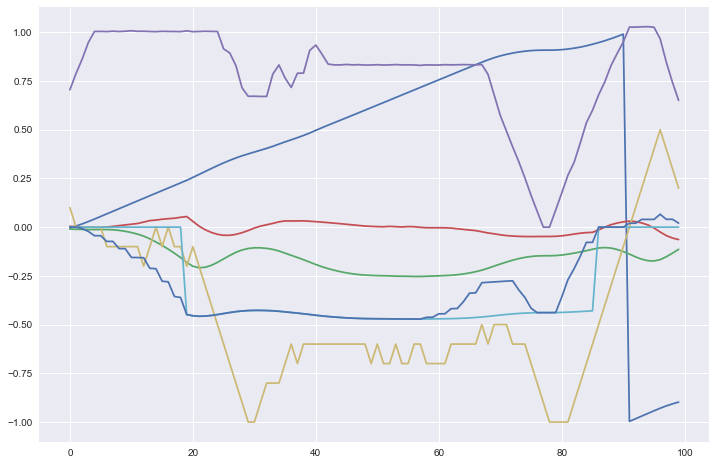

In [3]:
_ = plt.plot([b[:-10] for b in bel[-100:]])

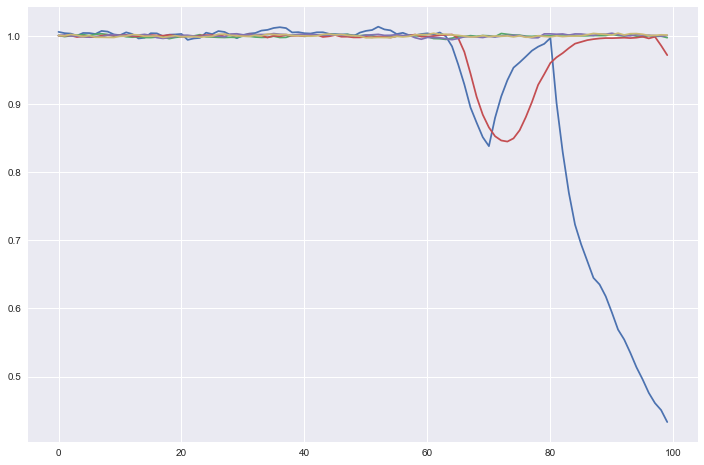

In [4]:
_ = plt.plot([b[-10:-5] for b in bel[-100:]])

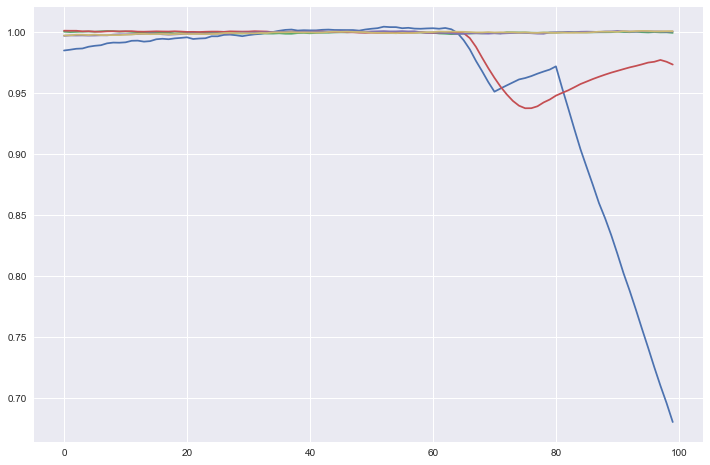

In [5]:
_ = plt.plot([b[-5:] for b in bel[-100:]])

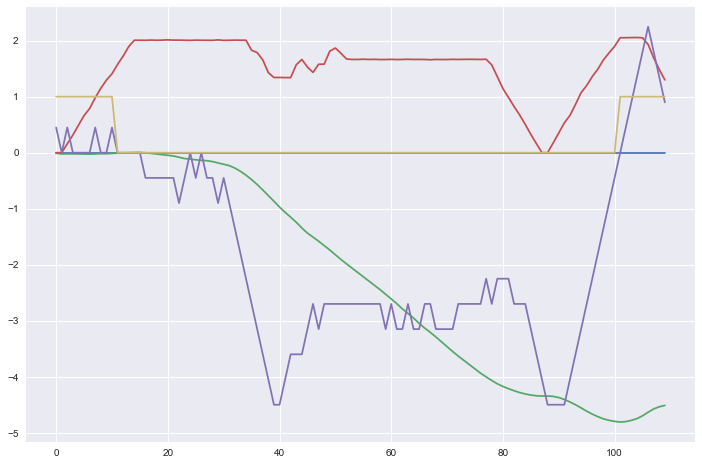

In [6]:
_ = plt.plot([o for o in obs])

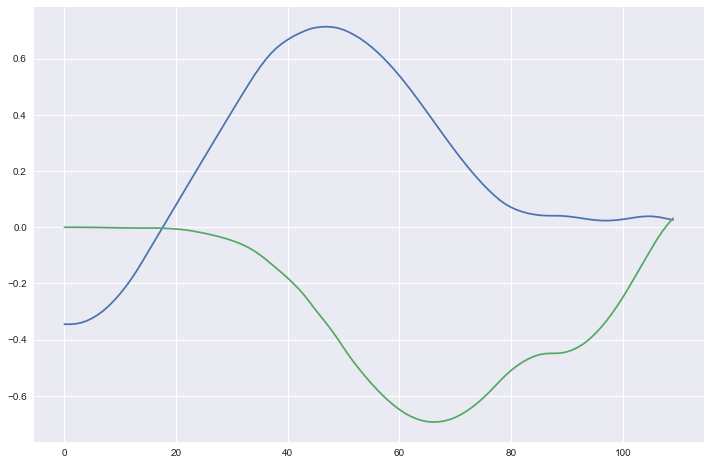

In [13]:
_ = plt.plot([p[:-1] for p in pos])

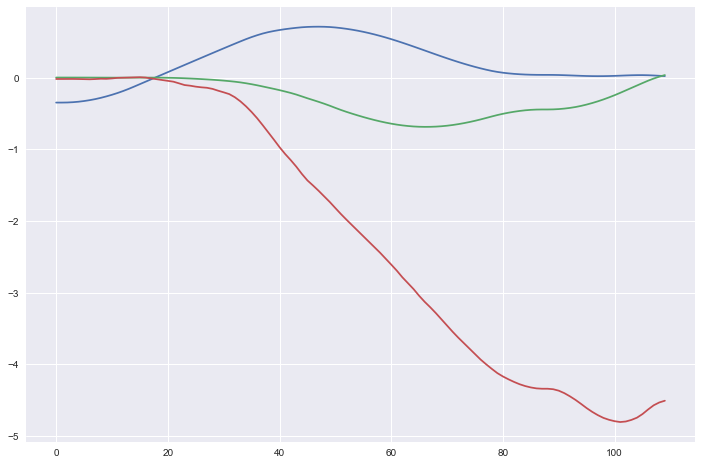

In [20]:
_ = plt.plot([p for p in apos])

In [18]:
plt.rcParams["figure.figsize"] = (8, 4)

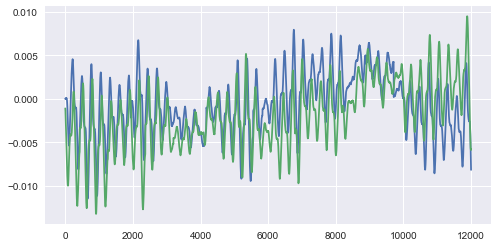

In [20]:
epos = [(pos[i][0], pos[i][1], obs[i][1] ) for i in range(len(pos))]
err = [epos[i] - apos[i] for i in range(len(pos))]
_ = plt.plot([e[:-1] for e in err[1:]])
#plt.savefig('xyerror.png', dpi=600)

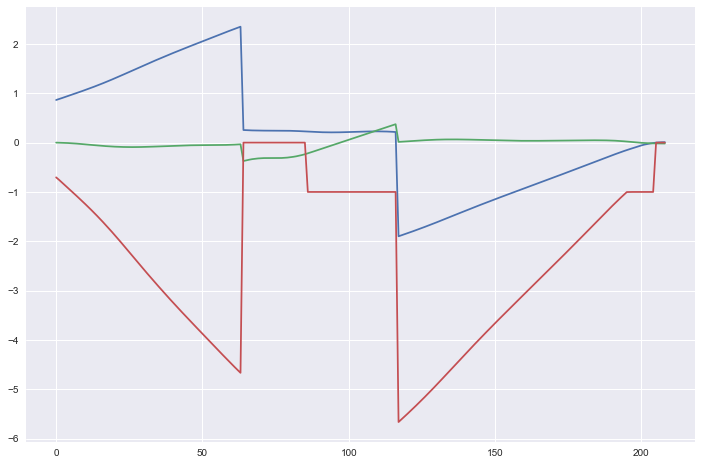

In [7]:
from DriveItCircuit import cartesian_to_median
posm = [cartesian_to_median(*p) for p in pos]
_ = plt.plot([p for p in posm])

In [23]:
_ = plt.plot([a for a in actions])

NameError: name 'plt' is not defined

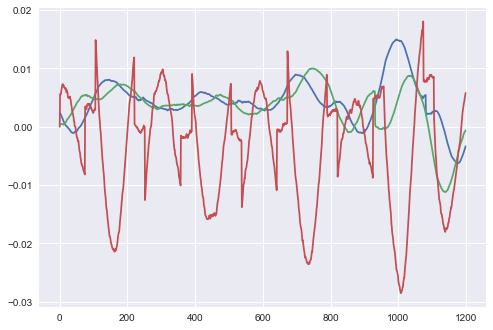

In [4]:
_ = plt.plot([e for e in err])

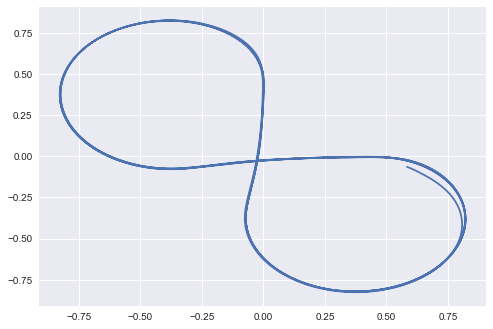

In [48]:
_ = plt.plot(x, y)

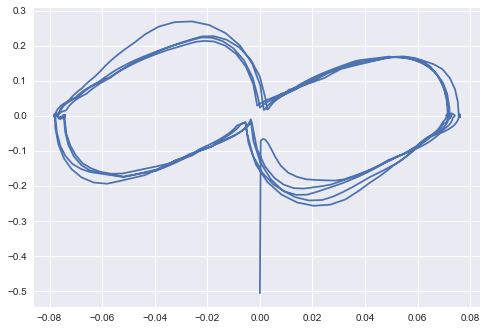

In [49]:
med = [(s[0],s[1],s[2]) for s in bel]
xm = [c[0] for c in med]
ym = [c[1] for c in med]
thm = [c[2] for c in med]
_ = plt.plot(ym, thm)

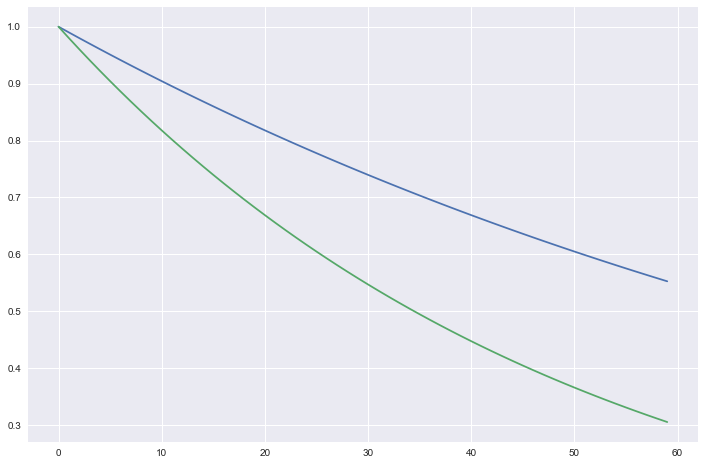

In [50]:
gamma, lam = 0.99, 0.99
T = 60
_ = plt.plot([gamma ** t for t in range(T)])
_ = plt.plot([gamma ** t * lam ** t for t in range(T)])